# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Explore Data

In [3]:
card=pd.read_csv('creditcard.csv')

In [4]:
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
card.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
card.shape

(284807, 31)

In [7]:
card.Class

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [8]:
df_class=pd.DataFrame(card.Class)

In [9]:
df_class.head()

,Class
0,0
1,0
2,0
3,0
4,0


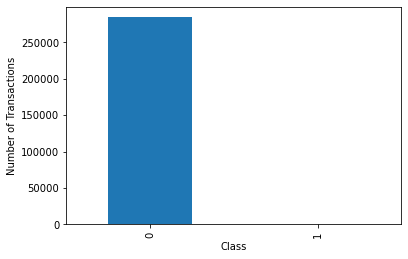

In [10]:
class_value=pd.value_counts(card['Class'])
plt.xlabel("Class")
plt.ylabel("Number of Transactions")
class_value.plot(kind='bar')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

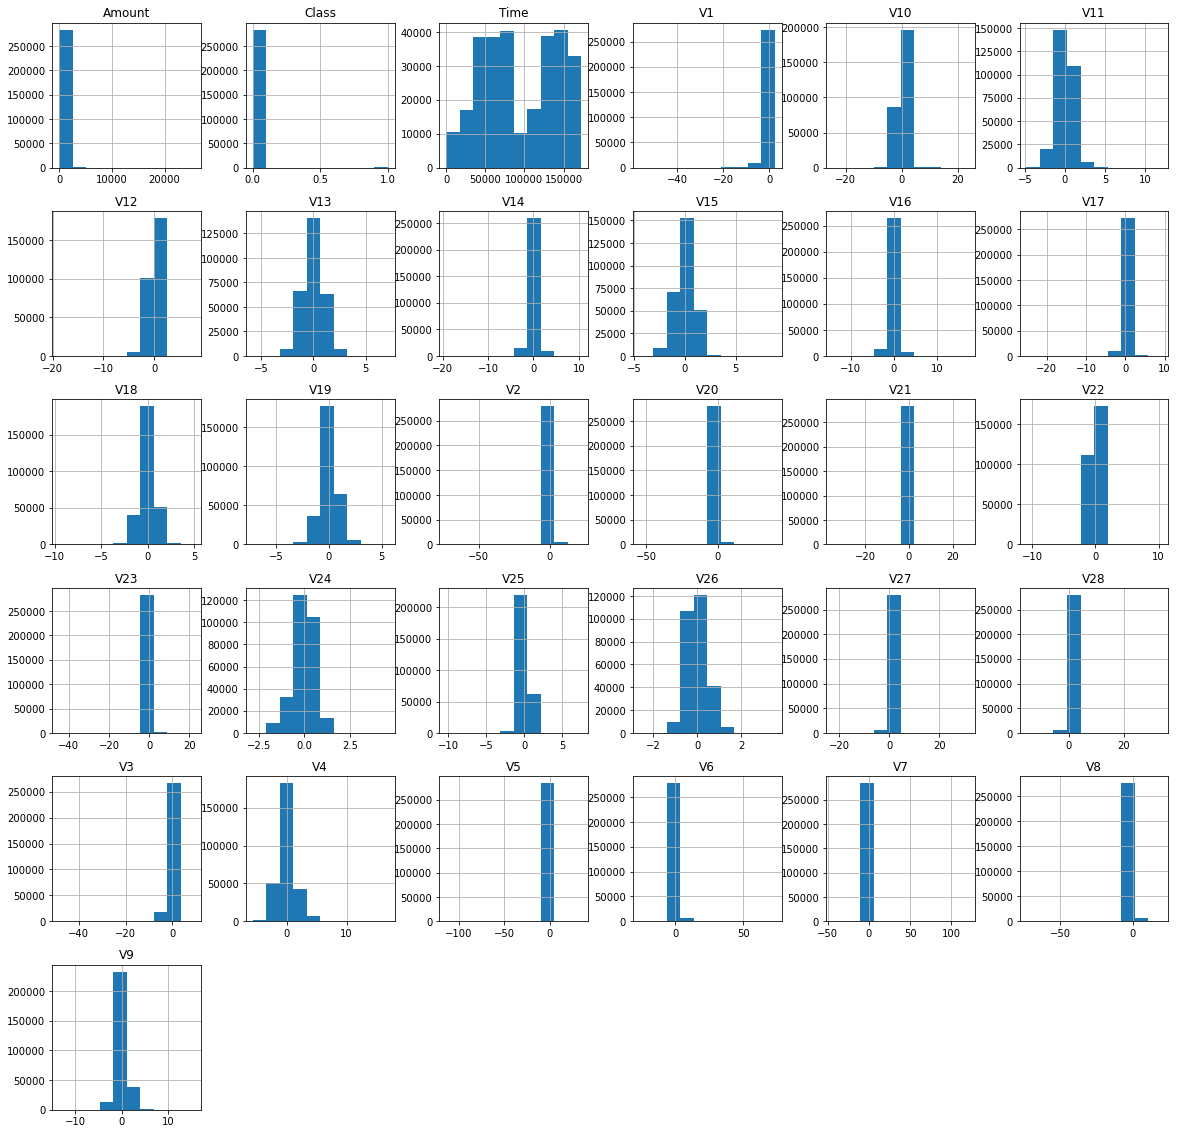

In [11]:
card.hist(figsize=(20, 20))
plt.show

In [12]:
Valid=card[card['Class']==0]
Fraud=card[card['Class']==1]

In [13]:
Valid.shape

(284315, 31)

In [14]:
Fraud.shape

(492, 31)

In [15]:
count=pd.value_counts(card.Class)

In [16]:
count

0    284315
1       492
Name: Class, dtype: int64

In [17]:
x=np.array(card.loc[:,card.columns!='Class'])
y=np.array(card.loc[:,card.columns=='Class'])

In [18]:
x.shape

(284807, 30)

In [19]:
y.shape

(284807, 1)

In [20]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.4, random_state=2)

In [21]:
x_train.shape

(170884, 30)

In [22]:
y_train.shape

(170884, 1)

In [23]:
x_test.shape

(113923, 30)

In [24]:
y_test.shape

(113923, 1)

# SMOTE

In [25]:
pip install imblearn

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
sm=SMOTE(random_state=100)

In [28]:
x_sm, y_sm=sm.fit_sample(x, y)

In [29]:
x_sm.shape

(568630, 30)

In [30]:
y_sm.shape

(568630,)

In [31]:
x_sm_train, x_sm_test, y_sm_train, y_sm_test=train_test_split(x_sm, y_sm, test_size=0.4, random_state=100)

In [32]:
x_sm_train.shape

(341178, 30)

In [33]:
y_sm_train.shape

(341178,)

In [34]:
x_sm_test.shape

(227452, 30)

In [35]:
y_sm_test.shape

(227452,)

# Compare 

In [36]:
print("Before over-sampling (0): {}".format(sum(y==0)))
print("Before over-smapling (1): {}".format(sum(y==1)))

Before over-sampling (0): [284315]
Before over-smapling (1): [492]


In [37]:
print("After over-sampling (0): {}".format(sum(y_sm==0)))
print("After over-sampling (1): {}".format(sum(y_sm==1)))

After over-sampling (0): 284315
After over-sampling (1): 284315


In [38]:
print("Before over-sampling (0): {}".format(sum(y_train==0)))
print("Before over-sampling (1): {}".format(sum(y_train==1)))

Before over-sampling (0): [170585]
Before over-sampling (1): [299]


In [39]:
print("After over-sampling (0): {}".format(sum(y_sm_train==0)))
print("After over-sampling (1): {}".format(sum(y_sm_train==1)))

After over-sampling (0): 170812
After over-sampling (1): 170366


In [40]:
print("Before over-sampling (0): {}".format(sum(y_test==0)))
print("Before over-sampling (1): {}".format(sum(y_test==1)))

Before over-sampling (0): [113730]
Before over-sampling (1): [193]


In [41]:
print("After over-sampling (0): {}".format(sum(y_sm_test==0)))
print("After over-sampling (1): {}".format(sum(y_sm_test==1)))

After over-sampling (0): 113503
After over-sampling (1): 113949


# Classification Model

In [42]:
clf=DecisionTreeClassifier()

In [63]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [69]:
y_predict=clf.predict(x_test)

In [71]:
print("Accuuracy before SMOTE",metrics.accuracy_score(y_test, y_predict))

Accuuracy before SMOTE 0.9988237669302951


In [64]:
clf.fit(x_sm_train, y_sm_train)

DecisionTreeClassifier()

In [65]:
y_sm_predict=clf.predict(x_sm_test)

In [72]:
print("Accuracy after SMOTE:", metrics.accuracy_score(y_sm_test, y_sm_predict))

Accuracy after SMOTE: 0.9979995779329265


# Performance of Model before SMOTE

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import average_precision_score

In [73]:
co=confusion_matrix(y_test, y_predict)

In [74]:
co

array([[113598,    132],
       [     2,    191]], dtype=int64)

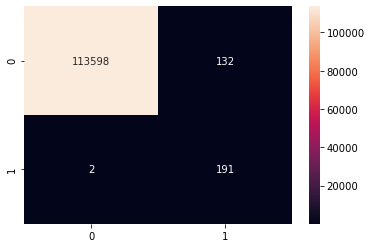

In [76]:
sns.heatmap(co, annot=True, fmt=".0f")

In [86]:
from sklearn.metrics import average_precision_score

In [90]:
av_pr=average_precision_score(y_test, y_predict)

In [97]:
print("Average Recall Score:{0:0.2f}".format(av_pr))

Average Recall Score:0.59


# Performance of Model after SMOTE

In [92]:
cm=confusion_matrix(y_sm_test, y_sm_predict)

In [93]:
cm

array([[113167,    336],
       [   119, 113830]], dtype=int64)

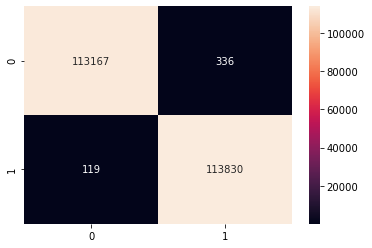

In [94]:
sns.heatmap(cm, annot=True, fmt=".0f")

In [95]:
average_precision=average_precision_score(y_sm_test, y_sm_predict)

In [98]:
print("Average Recall Score:{0:0.2f}".format(average_precision))

Average Recall Score:1.00
